In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [2]:
import sys

SOURCE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
sys.path.insert(0, SOURCE_DIR)

In [3]:
import malaya_speech
import tensorflow as tf

In [4]:
featurizer = malaya_speech.featurization.STTFeaturizer()

In [5]:
x, sr = malaya_speech.load('../speech/example-speaker/husein-zolkepli.wav')
len(x), sr

(90090, 16000)

In [6]:
y = featurizer(x)
y.shape

(564, 80)

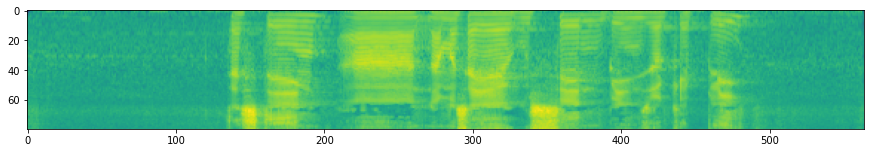

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))
plt.imshow(y.T)

CPU times: user 28.8 ms, sys: 1.99 ms, total: 30.8 ms
Wall time: 29.9 ms


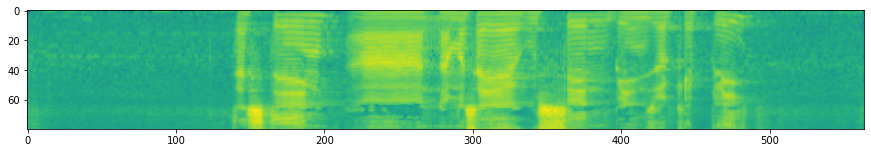

In [8]:
%%time

warped = malaya_speech.augmentation.spectrogram.warp_time_interpolate(y)
plt.figure(figsize = (15, 5))
plt.imshow(warped.T)

CPU times: user 17.7 ms, sys: 2.07 ms, total: 19.7 ms
Wall time: 18.1 ms


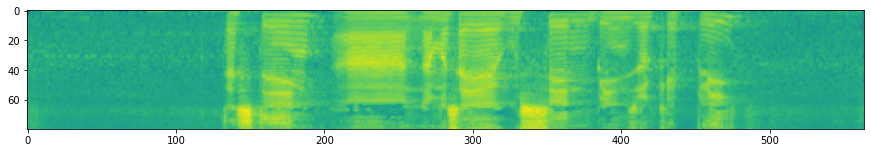

In [9]:
%%time

warped = malaya_speech.augmentation.spectrogram.warp_time_pil(y)
plt.figure(figsize = (15, 5))
plt.imshow(warped.T)

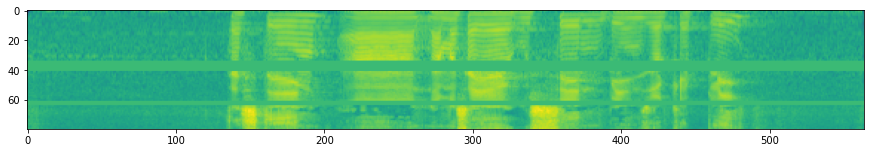

In [10]:
y_ = malaya_speech.augmentation.spectrogram.mask_frequency(y, n_freq_mask = 2, 
                                                           width_freq_mask = 15)

plt.figure(figsize = (15, 5))
plt.imshow(y_.T)

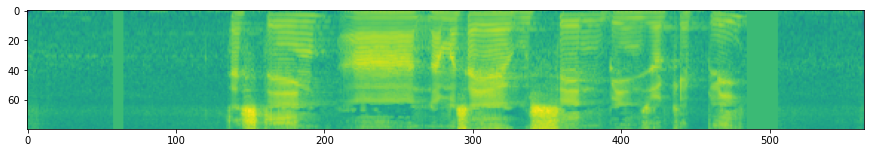

In [11]:
y_ = malaya_speech.augmentation.spectrogram.mask_time(y, n_time_mask = 2, 
                                                      width_time_mask = int(y.shape[0] * 0.05))

plt.figure(figsize = (15, 5))
plt.imshow(y_.T)

In [12]:
Y = tf.placeholder(tf.float32, [None, 80])
warped = malaya_speech.augmentation.spectrogram.tf_warp_time(Y, 200)
masked = malaya_speech.augmentation.spectrogram.tf_mask_frequency(warped, F = 12)
casted_len = tf.cast(tf.cast(tf.shape(masked)[0], tf.float32) * 0.05, tf.int32)
masked = malaya_speech.augmentation.spectrogram.tf_mask_time(masked, T = casted_len)


Instructions for updating:
Use `tf.cast` instead.


In [13]:
sess = tf.Session()

CPU times: user 22.8 ms, sys: 2.71 ms, total: 25.5 ms
Wall time: 22.2 ms


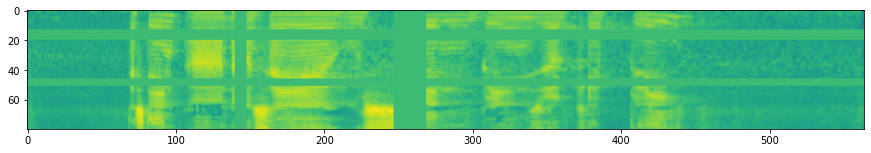

In [18]:
%%time

m = sess.run(masked, feed_dict = {Y: y})
plt.figure(figsize = (15, 5))
plt.imshow(m.T)